In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'Data_Sets/reviews.csv')

In [4]:
data.head()

,user_id,title,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,review_text,ep_watched,n_helpful
0,c8ffdab3f2a338eeb54b265598dbbb55,Sing My Crush,9.0,9.0,10.0,9.0,9.0,the Best Song from my Crush This will now ran...,8 of 8 episodes seen,23
1,c8ffdab3f2a338eeb54b265598dbbb55,Happy Merry Ending,5.0,7.0,9.0,4.0,6.5,I'm Happy and Merry That it Ended Quickly The ...,8 of 8 episodes seen,31
2,c8ffdab3f2a338eeb54b265598dbbb55,Duty After School: Part 2,4.0,9.0,3.0,1.0,4.0,This PART 2 Should Never Have Happened If you...,4 of 4 episodes seen,121
3,c8ffdab3f2a338eeb54b265598dbbb55,Our Dating Sim,9.0,9.5,9.0,9.0,9.0,I want to play this dating sim! I want to pla...,8 of 8 episodes seen,79
4,c8ffdab3f2a338eeb54b265598dbbb55,The Director Who Buys Me Dinner,7.5,8.5,7.0,6.0,7.0,"Half-Cooked, Dont Eat A hard pass, unless som...",10 of 10 episodes seen,66


In [5]:
data.describe()

,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,n_helpful
count,10625.000000,10625.000000,10625.000000,10625.000000,10625.000000,10625.000000
mean,7.501459,8.442635,7.597271,6.170447,7.636988,15.553035
std,2.221619,1.750424,2.188483,3.086057,2.109013,31.726984
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,6.000000,8.000000,6.500000,4.000000,6.500000,2.000000
50%,8.000000,9.000000,8.000000,7.000000,8.000000,6.000000
75%,9.000000,10.000000,9.500000,9.000000,9.500000,15.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,551.000000


In [6]:
data.isnull().sum()

user_id                0
title                  0
story_score            0
acting_cast_score      0
music_score            0
rewatch_value_score    0
overall_score          0
review_text            6
ep_watched             0
n_helpful              0
dtype: int64

In [7]:
df=data.drop(['user_id','review_text','ep_watched','title'],axis=1)

In [8]:
df

,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,n_helpful
0,9.0,9.0,10.0,9.0,9.0,23
1,5.0,7.0,9.0,4.0,6.5,31
2,4.0,9.0,3.0,1.0,4.0,121
3,9.0,9.5,9.0,9.0,9.0,79
4,7.5,8.5,7.0,6.0,7.0,66
...,...,...,...,...,...,...
10620,8.0,9.0,7.0,9.0,9.0,3
10621,8.5,10.0,10.0,10.0,9.5,40
10622,5.5,7.5,7.5,5.5,5.5,29
10623,9.0,10.0,10.0,8.0,9.5,23


In [9]:
import scipy.stats as stats

In [10]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

Text(0.5, 1.0, 'Box plot of numerical value')

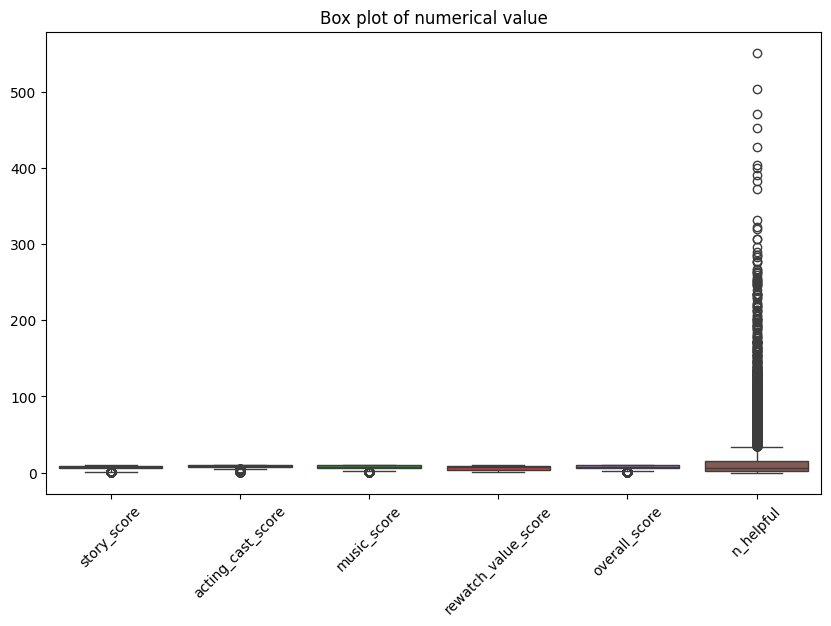

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(df[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box plot of numerical value')

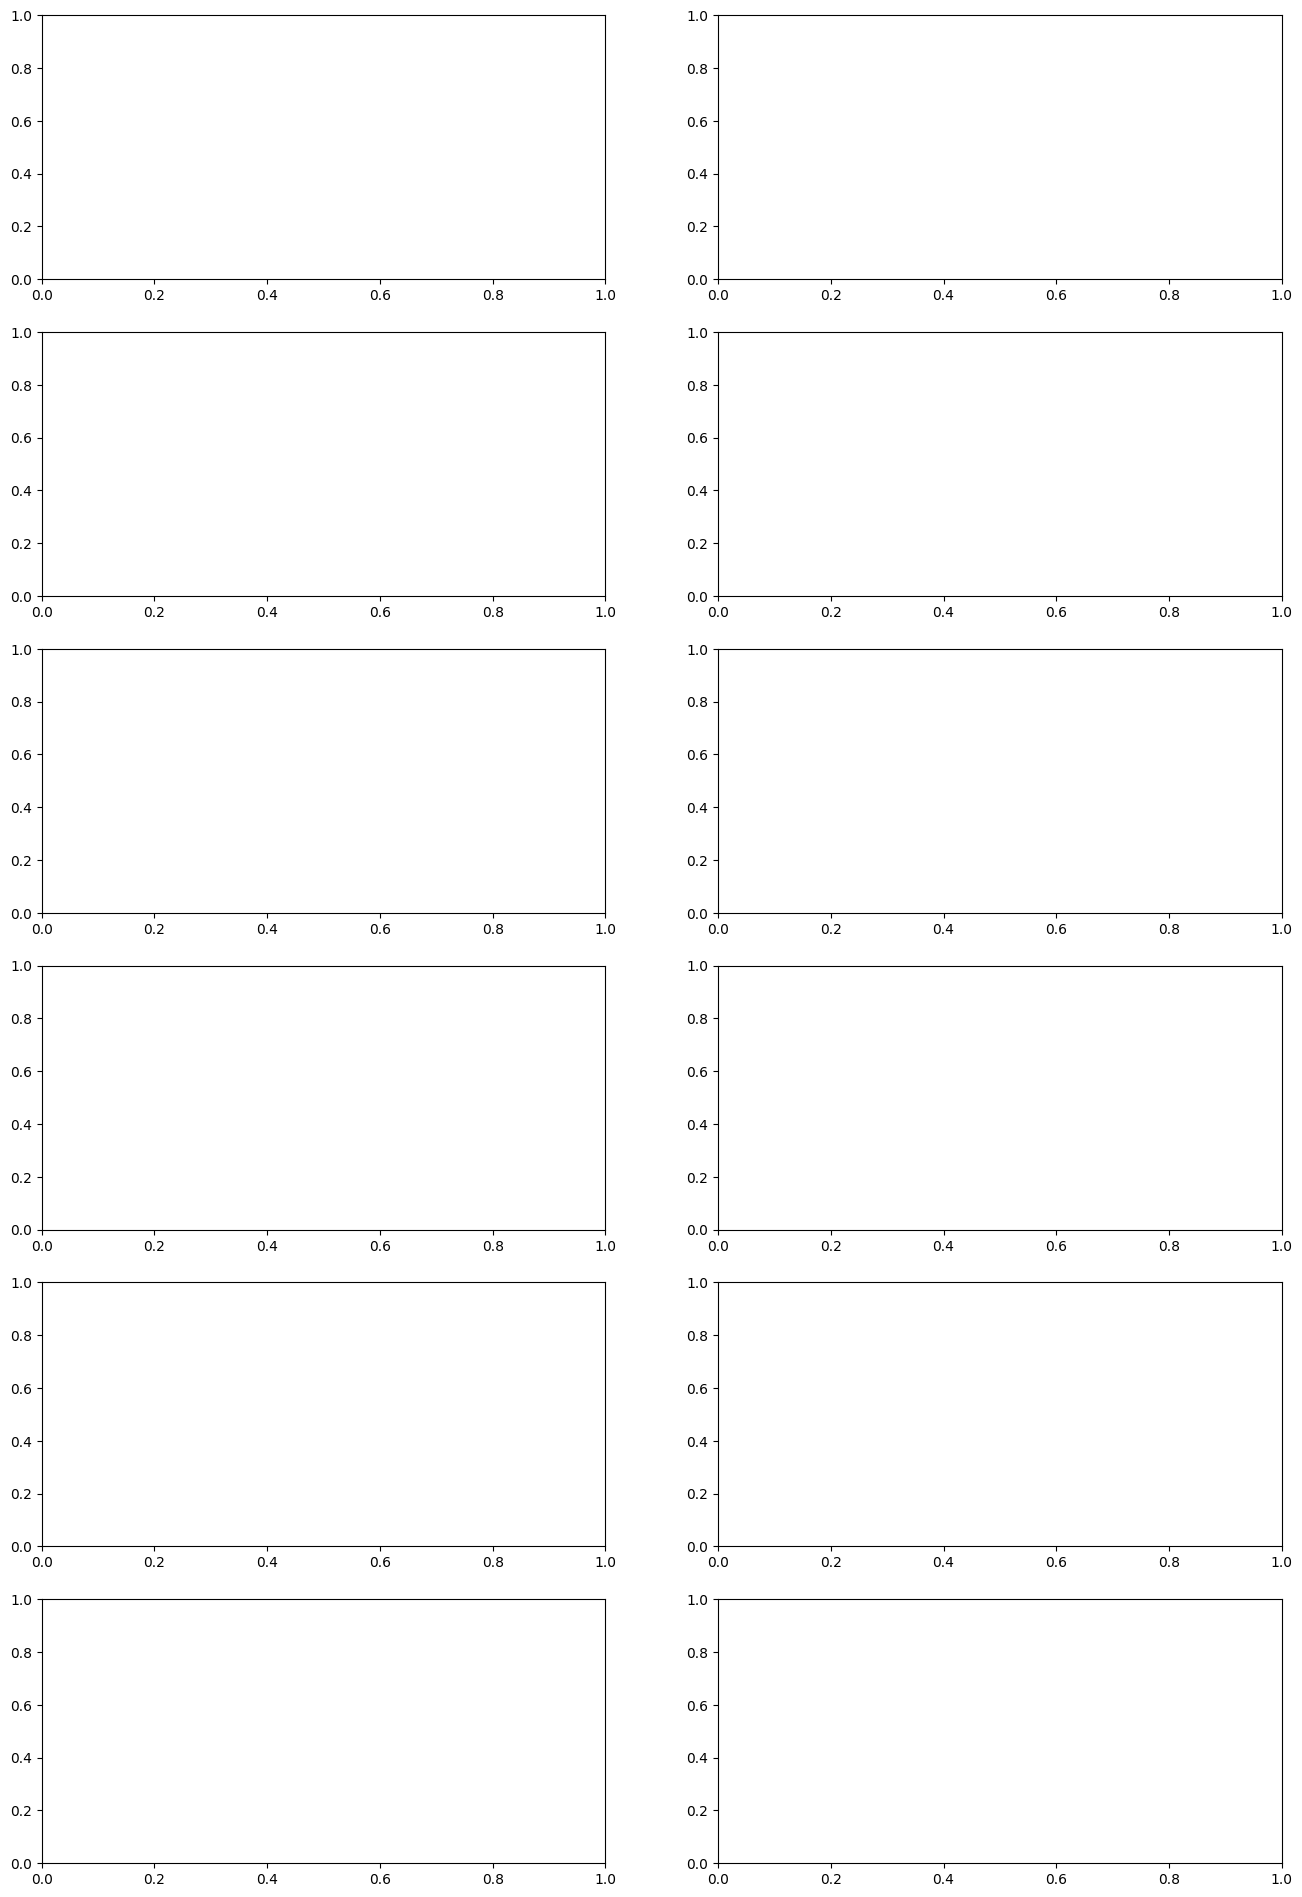

In [12]:
num_cols=len(numerical_columns)
fig,axes =plt.subplots(num_cols, 2, figsize=(16, num_cols*4))

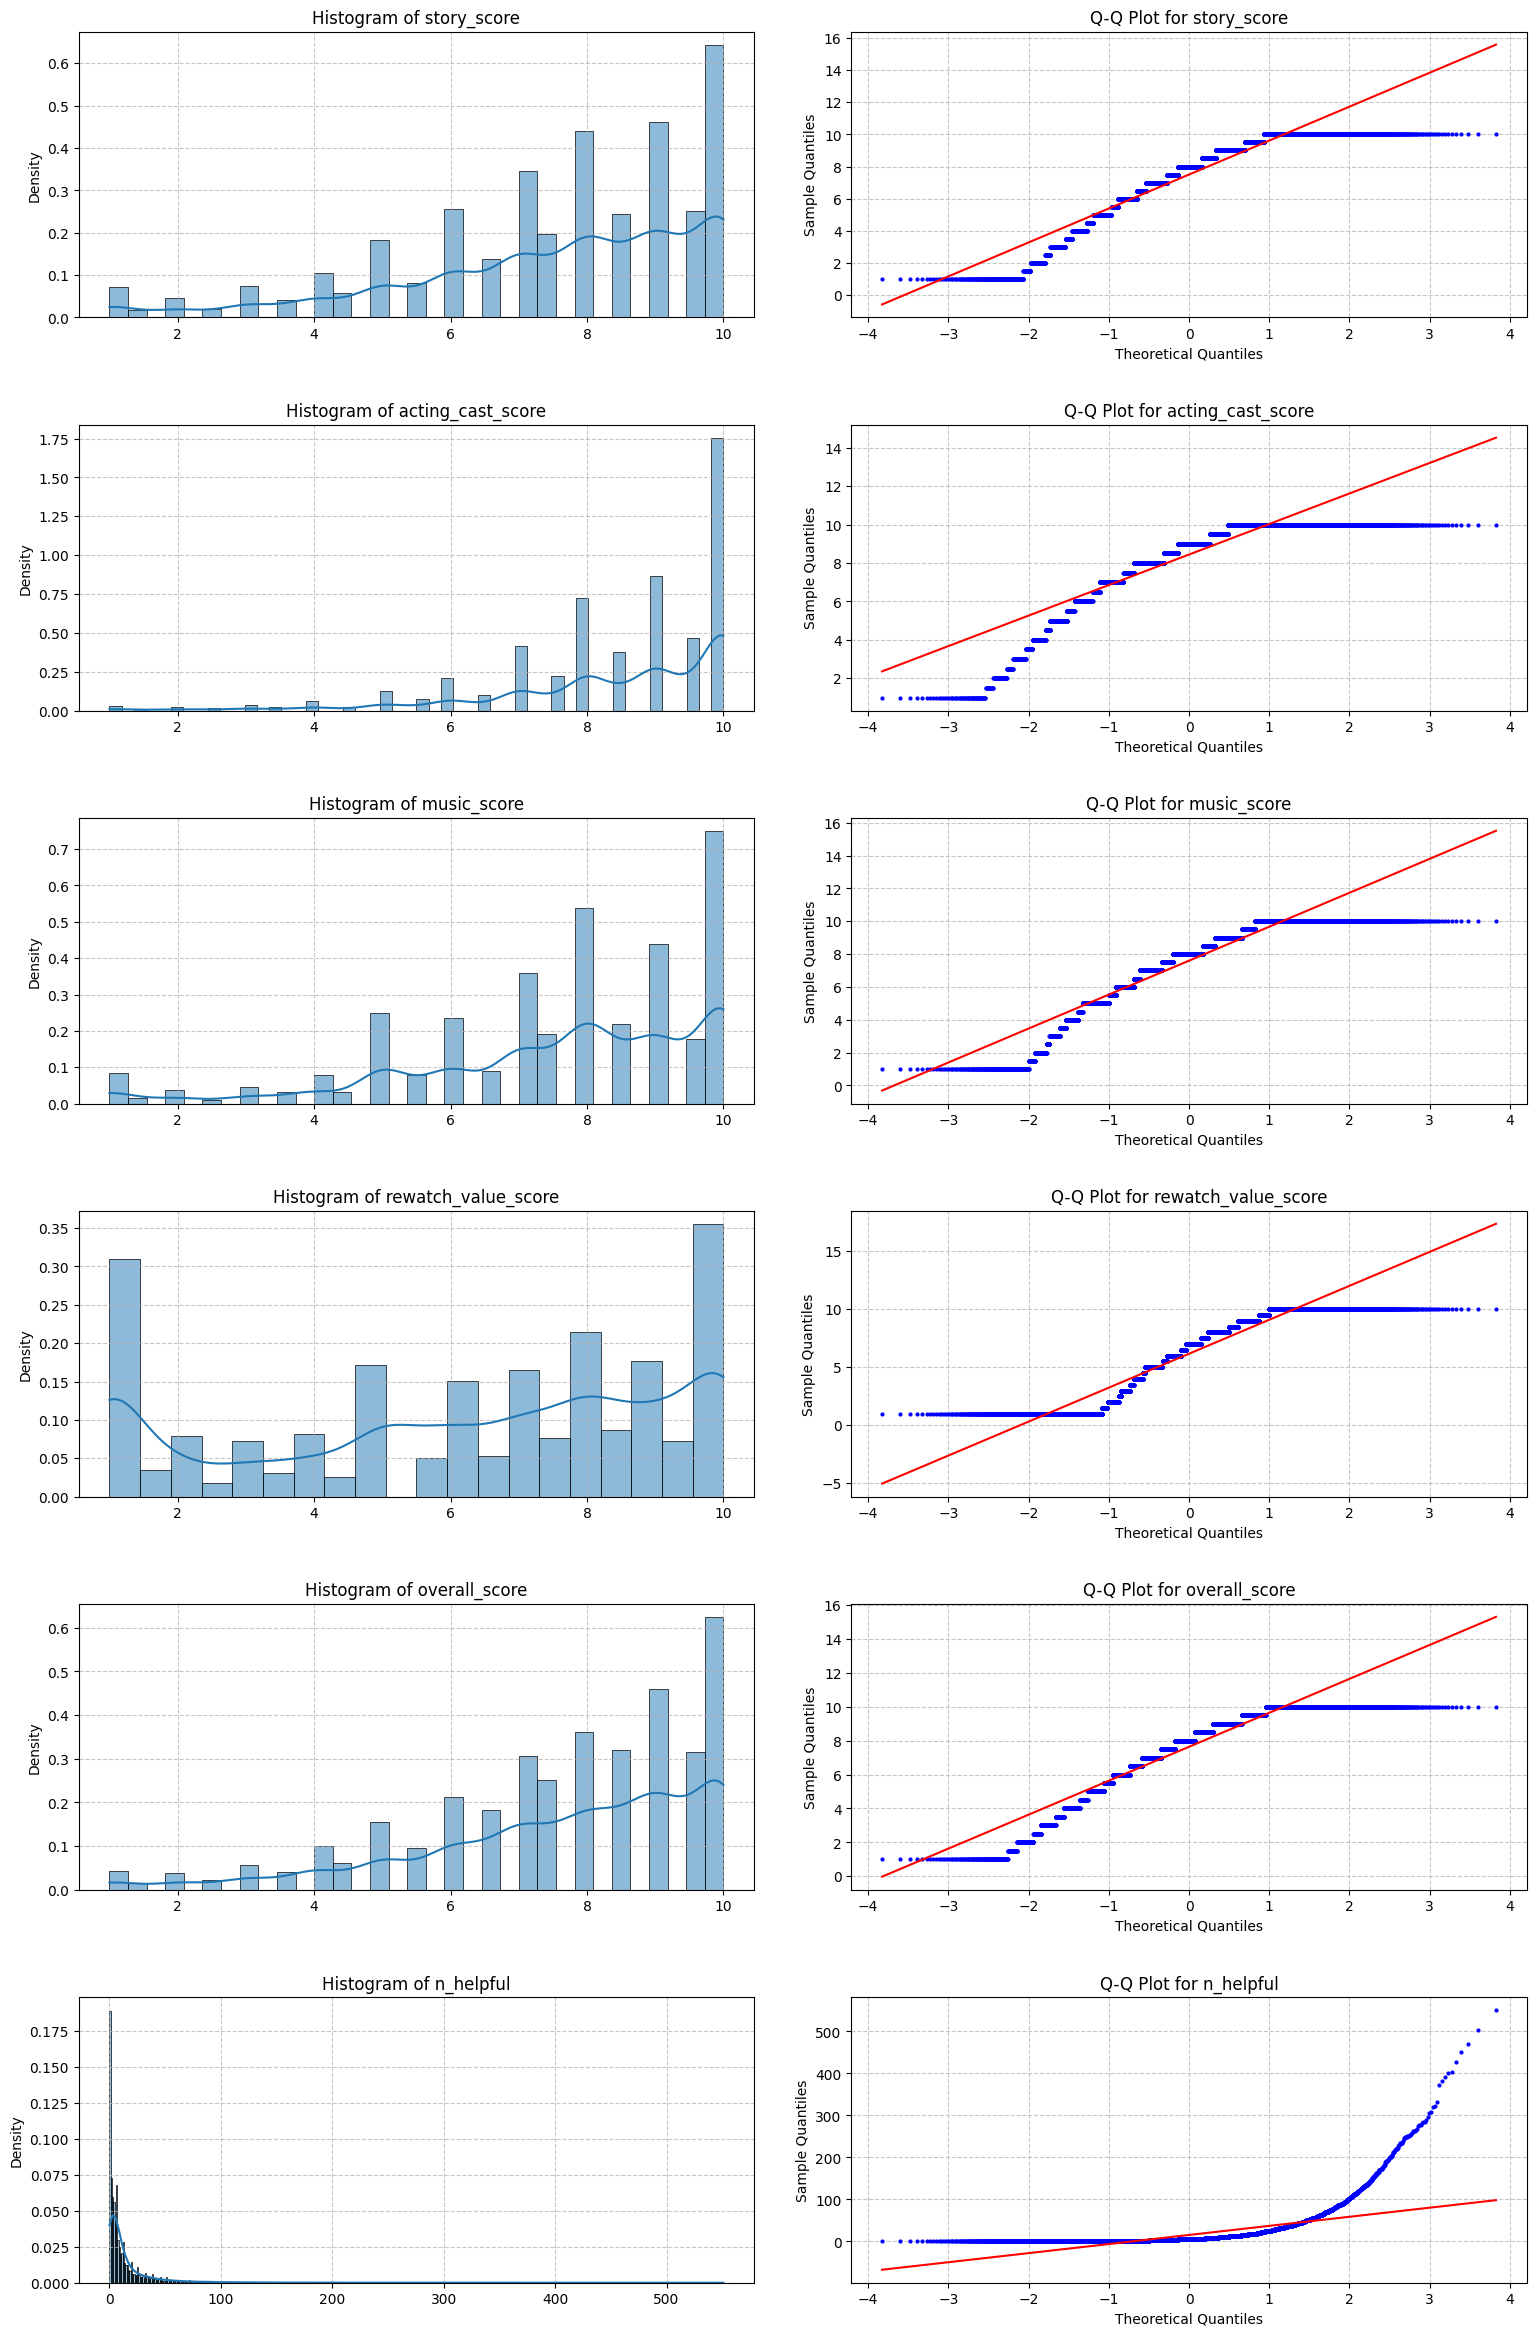

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np


# Create a figure and axes for subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(num_cols, 2, figsize=(16, num_cols * 4))

# Plotting histograms and Q-Q plots for each numerical column
for i, col in enumerate(numerical_columns):
    # Histogram on the left subplot
    sns.histplot(df[col], kde=True, ax=axes[i, 0], stat='density', linewidth=0.5)
    axes[i, 0].set_title(f'Histogram of {col}')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('Density')
    axes[i, 0].grid(True, linestyle='--', alpha=0.7)
    
    # Q-Q plot on the right subplot
    stats.probplot(df[col], plot=axes[i, 1], dist='norm', fit=True)
    axes[i, 1].get_lines()[0].set_markersize(2.0)  # Adjust marker size for clarity
    axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    axes[i, 1].set_title(f'Q-Q Plot for {col}')
    axes[i, 1].set_xlabel('Theoretical Quantiles')
    axes[i, 1].set_ylabel('Sample Quantiles')

# Adjust layout and display the plots
plt.tight_layout(pad=3.0)
plt.show()

In [14]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [15]:
from scipy.stats import anderson,jarque_bera, shapiro,normaltest,kstest
from statsmodels.stats.diagnostic import lilliefors

In [16]:
# Function to perform normality tests
def test_normality(df, col):
    print(f'Column: {col}')

    # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shapiro-Wilk Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Shapiro-Wilk Test: {col} does not look normally distributed (reject H0)')

    # Anderson-Darling test
    result_anderson = anderson(df[col])
    print(f'Anderson-Darling Test: Statistics={result_anderson.critical_values}')
    print(f'Anderson-Darling Test: Critical Values:{result_anderson.critical_values}')
    if result_anderson.statistic < result_anderson.critical_values[2]:
        print(f'Anderson-Darling Test :{col} looks normally distribuited (fail to reject H0)')
    else:
        print(f'Anderson-Darling Test :{col} does not look normally distribuited (reject H0)')

    #Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB Statistic={jb_stat:.3f}, p-value={p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed(fail to reject H0)')
    else:
        print(f'Jarque-Bera Test: {col} does not looks normally distributed(reject H0)')

    #D'Agostino and Pearson's test
    stat_agostino,p_agostino=normaltest(df[col])
    print(f"D'Agostino and Pearson's test: Statistics={stat_agostino:.3f},p-value={p_agostino:.3f}")
    if p_agostino>0.05:
        print(f"D'Agostino and Pearson's test: {col} looks normally distributed(fail to reject H0)")
    else:
        print(f"D'Agostino and Pearson's test: {col} does not looks normally distributed(reject H0)")
    
    #Kolmogorov-Smirmov test
    ks_stat,p_ks=kstest(df[col],'norm')
    print(f"Kolmogorov-Smirmov test: KS Statistics={ks_stat:.3f},p-value={p_ks:.3f}")
    if p_ks>0.05:
        print(f"Kolmogorov-Smirmov test: {col} looks normally distributed(fail to reject H0)")
    else:
        print(f"Kolmogorov-Smirmov test: {col} does not looks normally distributed(reject H0)")
    
    #lilliefors test
    stat_lilliefors,p_lilliefors= lilliefors(df[col])
    print(f"Lilliefors test: Statistics={stat_lilliefors:.3f},p-value={p_lilliefors:.3f}")
    if p_lilliefors>0.05:
        print(f"Lilliefors test: {col} looks normally distributed(fail to reject H0)")
    else:
        print(f"Lilliefors test: {col} does not looks normally distributed(reject H0)")

    print('\n')

for col in numerical_columns:
    test_normality(df,col)

Column: story_score
Shapiro-Wilk Test: Statistics=0.902, p-value=0.000
Shapiro-Wilk Test: story_score does not look normally distributed (reject H0)
Anderson-Darling Test: Statistics=[0.576 0.656 0.787 0.918 1.092]
Anderson-Darling Test: Critical Values:[0.576 0.656 0.787 0.918 1.092]
Anderson-Darling Test :story_score does not look normally distribuited (reject H0)
Jarque-Bera Test: JB Statistic=1773.133, p-value=0.000
Jarque-Bera Test: story_score does not looks normally distributed(reject H0)
D'Agostino and Pearson's test: Statistics=1272.861,p-value=0.000
D'Agostino and Pearson's test: story_score does not looks normally distributed(reject H0)
Kolmogorov-Smirmov test: KS Statistics=0.957,p-value=0.000
Kolmogorov-Smirmov test: story_score does not looks normally distributed(reject H0)
Lilliefors test: Statistics=0.145,p-value=0.001
Lilliefors test: story_score does not looks normally distributed(reject H0)


Column: acting_cast_score
Shapiro-Wilk Test: Statistics=0.824, p-value=0.00

C:\Users\shrijal\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10625.
  res = hypotest_fun_out(*samples, **kwds)


In [17]:
def find_outliers_iqr(data):
    outliers_mask=pd.Series(index=data.columns,dtype=bool)
    for col in data.columns:
        if col in numerical_columns: #Proccess only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3-Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers_mask = (data[col]<lower_bound)|(data[col]>upper_bound)
            outliers_mask[col]=col_outliers_mask.any() #true if any outliers detected
    return outliers_mask

outliers_iqr_mask=find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col,is_outlier in outliers_iqr_mask.items():
    print(f"{col}:{is_outlier}")

Outliers detected using IQR method:
story_score:True
acting_cast_score:True
music_score:True
rewatch_value_score:False
overall_score:True
n_helpful:True


In [18]:
def remove_outliers_iqr(data):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    return cleaned_data

cleaned_data_iqr = remove_outliers_iqr(df)
print("DataFrame after removing outliers using IQR method:")
print(cleaned_data_iqr)

DataFrame after removing outliers using IQR method:
       story_score  acting_cast_score  music_score  rewatch_value_score  \
0              9.0                9.0         10.0                  9.0   
1              5.0                7.0          9.0                  4.0   
5              9.0                9.5          7.0                  8.0   
25             8.0                8.5          7.5                  6.5   
26             6.0                7.0          7.5                  3.5   
...            ...                ...          ...                  ...   
10618          6.5                8.0          7.0                  6.0   
10619          8.5                8.5         10.0                  8.0   
10620          8.0                9.0          7.0                  9.0   
10622          5.5                7.5          7.5                  5.5   
10623          9.0               10.0         10.0                  8.0   

       overall_score  n_helpful  
0            

Text(0.5, 1.0, 'Box plot of numerical value')

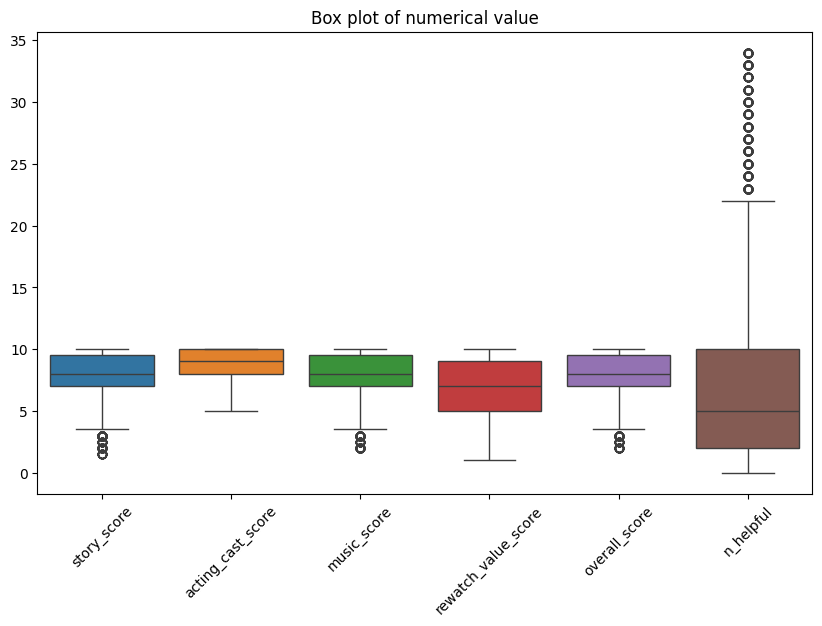

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(cleaned_data_iqr[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box plot of numerical value')

In [20]:
df=cleaned_data_iqr

In [21]:
def find_outliers_iqr(data):
    outliers_mask=pd.Series(index=data.columns,dtype=bool)
    for col in data.columns:
        if col in numerical_columns: #Proccess only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3-Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers_mask = (data[col]<lower_bound)|(data[col]>upper_bound)
            outliers_mask[col]=col_outliers_mask.any() #true if any outliers detected
    return outliers_mask

outliers_iqr_mask=find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col,is_outlier in outliers_iqr_mask.items():
    print(f"{col}:{is_outlier}")

Outliers detected using IQR method:
story_score:True
acting_cast_score:False
music_score:True
rewatch_value_score:False
overall_score:True
n_helpful:True


In [24]:
def remove_outliers_zscore(data, threshold=3):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            cleaned_data = cleaned_data[z_scores <= threshold]

    return cleaned_data

cleaned_data_zscore = remove_outliers_zscore(df)
print("\nDataFrame after removing outliers using Z-score method:")
print(cleaned_data_zscore)


DataFrame after removing outliers using Z-score method:
       story_score  acting_cast_score  music_score  rewatch_value_score  \
0              9.0                9.0         10.0                  9.0   
5              9.0                9.5          7.0                  8.0   
25             8.0                8.5          7.5                  6.5   
26             6.0                7.0          7.5                  3.5   
27            10.0               10.0         10.0                 10.0   
...            ...                ...          ...                  ...   
10618          6.5                8.0          7.0                  6.0   
10619          8.5                8.5         10.0                  8.0   
10620          8.0                9.0          7.0                  9.0   
10622          5.5                7.5          7.5                  5.5   
10623          9.0               10.0         10.0                  8.0   

       overall_score  n_helpful  
0       

C:\Users\shrijal\AppData\Local\Temp\ipykernel_5724\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\shrijal\AppData\Local\Temp\ipykernel_5724\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\shrijal\AppData\Local\Temp\ipykernel_5724\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\shrijal\AppData\Local\Temp\ipykernel_5724\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\shrijal\AppData\Local\Temp\ipykernel_5724\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]


Text(0.5, 1.0, 'Box plot of numerical value')

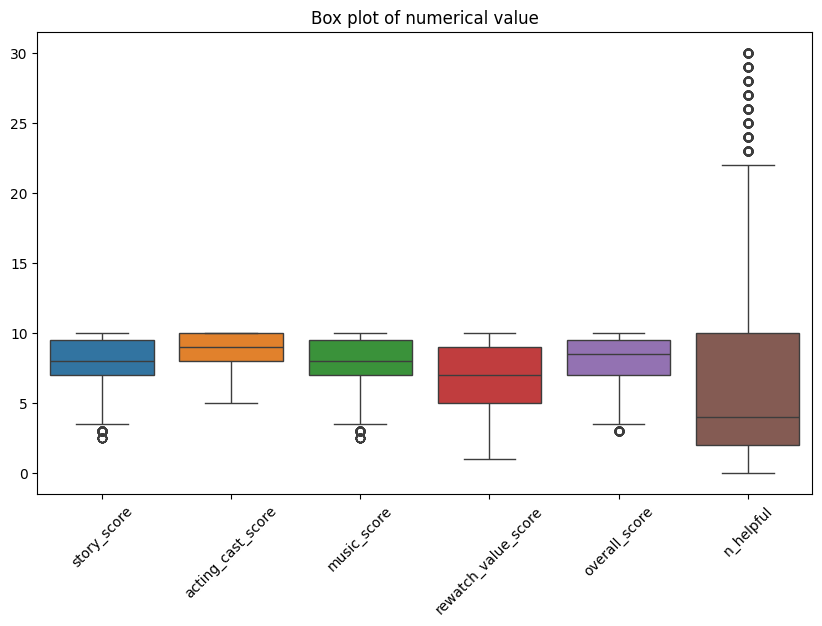

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(cleaned_data_zscore[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box plot of numerical value')

In [26]:
def remove_outliers_zscore(data, threshold=3):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            cleaned_data = cleaned_data[z_scores <= threshold]

    return cleaned_data

cleaned_data_zscore = remove_outliers_zscore(df)
print("\nDataFrame after removing outliers using Z-score method:")
print(cleaned_data_zscore)


DataFrame after removing outliers using Z-score method:
       story_score  acting_cast_score  music_score  rewatch_value_score  \
0              9.0                9.0         10.0                  9.0   
5              9.0                9.5          7.0                  8.0   
25             8.0                8.5          7.5                  6.5   
26             6.0                7.0          7.5                  3.5   
27            10.0               10.0         10.0                 10.0   
...            ...                ...          ...                  ...   
10618          6.5                8.0          7.0                  6.0   
10619          8.5                8.5         10.0                  8.0   
10620          8.0                9.0          7.0                  9.0   
10622          5.5                7.5          7.5                  5.5   
10623          9.0               10.0         10.0                  8.0   

       overall_score  n_helpful  
0       

C:\Users\shrijal\AppData\Local\Temp\ipykernel_5724\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\shrijal\AppData\Local\Temp\ipykernel_5724\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\shrijal\AppData\Local\Temp\ipykernel_5724\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\shrijal\AppData\Local\Temp\ipykernel_5724\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]
C:\Users\shrijal\AppData\Local\Temp\ipykernel_5724\1206922862.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_data = cleaned_data[z_scores <= threshold]


Text(0.5, 1.0, 'Box plot of numerical value')

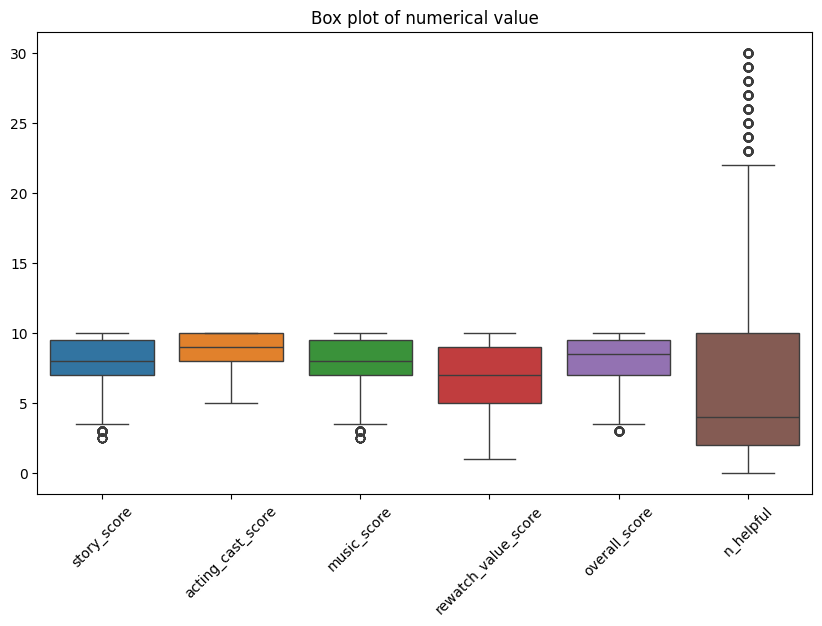

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(cleaned_data_zscore[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box plot of numerical value')

In [28]:
def find_outliers_iqr(data):
    outliers_mask=pd.Series(index=data.columns,dtype=bool)
    for col in data.columns:
        if col in numerical_columns: #Proccess only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3-Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            col_outliers_mask = (data[col]<lower_bound)|(data[col]>upper_bound)
            outliers_mask[col]=col_outliers_mask.any() #true if any outliers detected
    return outliers_mask

outliers_iqr_mask=find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col,is_outlier in outliers_iqr_mask.items():
    print(f"{col}:{is_outlier}")

Outliers detected using IQR method:
story_score:True
acting_cast_score:False
music_score:True
rewatch_value_score:False
overall_score:True
n_helpful:True


In [29]:
def remove_outliers_iqr(data):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    return cleaned_data

cleaned_data_iqr = remove_outliers_iqr(df)
print("DataFrame after removing outliers using IQR method:")
print(cleaned_data_iqr)

DataFrame after removing outliers using IQR method:
       story_score  acting_cast_score  music_score  rewatch_value_score  \
27            10.0               10.0         10.0                 10.0   
28             9.0                9.5          8.0                  8.5   
29             6.5                7.5          7.5                  5.0   
30             8.0                9.0          9.0                  8.0   
31             7.5                8.5          8.5                  6.0   
...            ...                ...          ...                  ...   
10616          9.0                7.5          9.0                  9.0   
10617         10.0               10.0         10.0                 10.0   
10618          6.5                8.0          7.0                  6.0   
10619          8.5                8.5         10.0                  8.0   
10620          8.0                9.0          7.0                  9.0   

       overall_score  n_helpful  
27           

Text(0.5, 1.0, 'Box plot of numerical value')

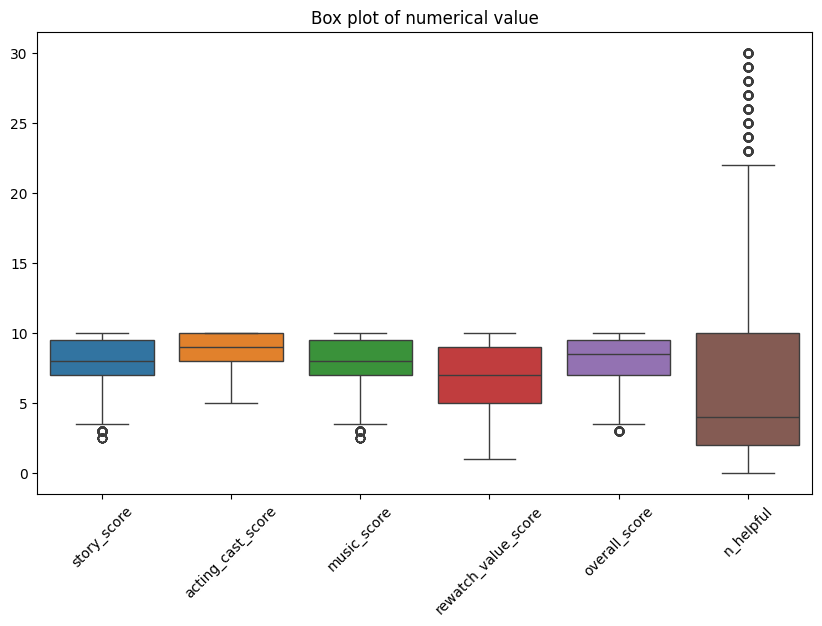

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(cleaned_data_zscore[numerical_columns])
plt.xticks(rotation=45)
plt.title('Box plot of numerical value')

In [31]:
df=cleaned_data_zscore

# Outlier is now removed now

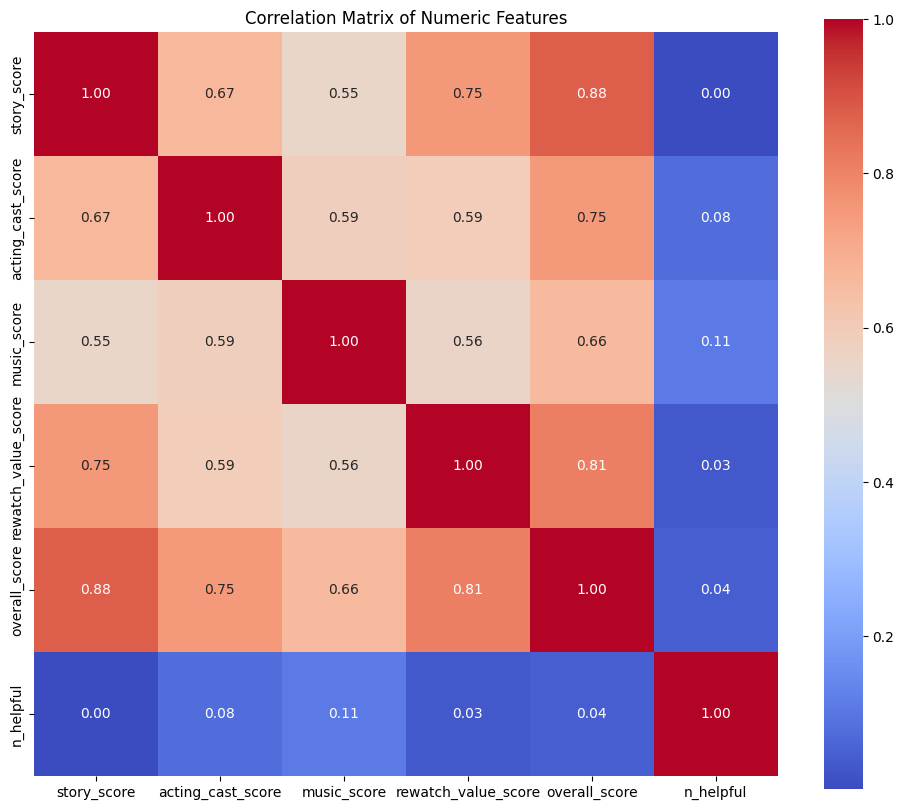

In [32]:
numeric_data=df[numerical_columns]

# compute pairwise correlation of numeric columns
correlation_matrix=numeric_data.corr()

#plotting correlationheatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f',square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

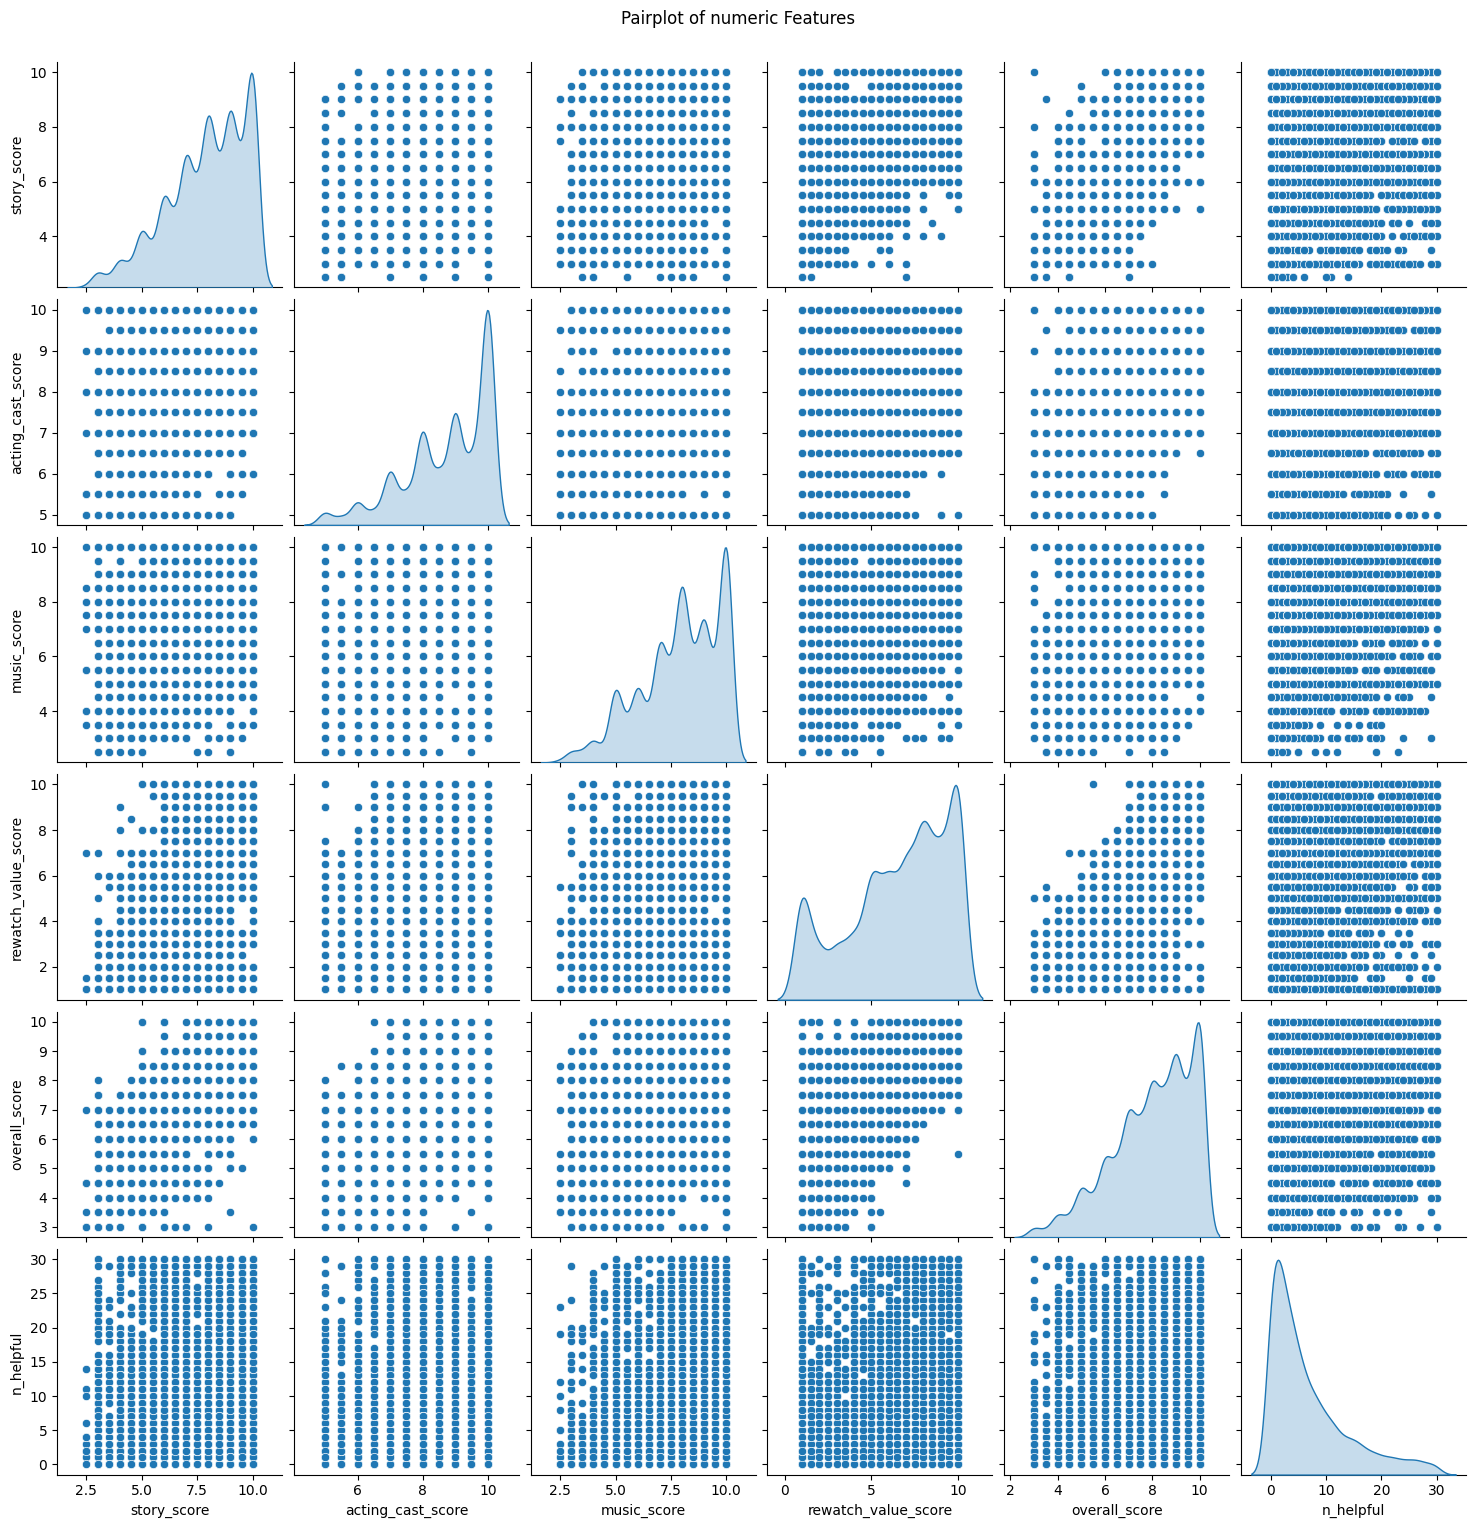

In [33]:
sns.pairplot(df[numerical_columns],diag_kind='kde')
plt.suptitle('Pairplot of numeric Features',y=1.02)
plt.show()

In [34]:
df.head()

,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,n_helpful
0,9.0,9.0,10.0,9.0,9.0,23
5,9.0,9.5,7.0,8.0,8.5,26
25,8.0,8.5,7.5,6.5,7.5,24
26,6.0,7.0,7.5,3.5,6.0,25
27,10.0,10.0,10.0,10.0,10.0,12


In [35]:
print(list(df.columns))

['story_score', 'acting_cast_score', 'music_score', 'rewatch_value_score', 'overall_score', 'n_helpful']


In [36]:

#create new column 'hit/flop' based on GPA condition
df['Hit/Flop'] = df['overall_score'].apply(lambda x: 'Hit' if x >=8.5 else 'Flop')
df.head()

,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,n_helpful,Hit/Flop
0,9.0,9.0,10.0,9.0,9.0,23,Hit
5,9.0,9.5,7.0,8.0,8.5,26,Hit
25,8.0,8.5,7.5,6.5,7.5,24,Flop
26,6.0,7.0,7.5,3.5,6.0,25,Flop
27,10.0,10.0,10.0,10.0,10.0,12,Hit


In [37]:
df['Hit/Flop'].value_counts()

Hit/Flop
Hit     4231
Flop    4205
Name: count, dtype: int64

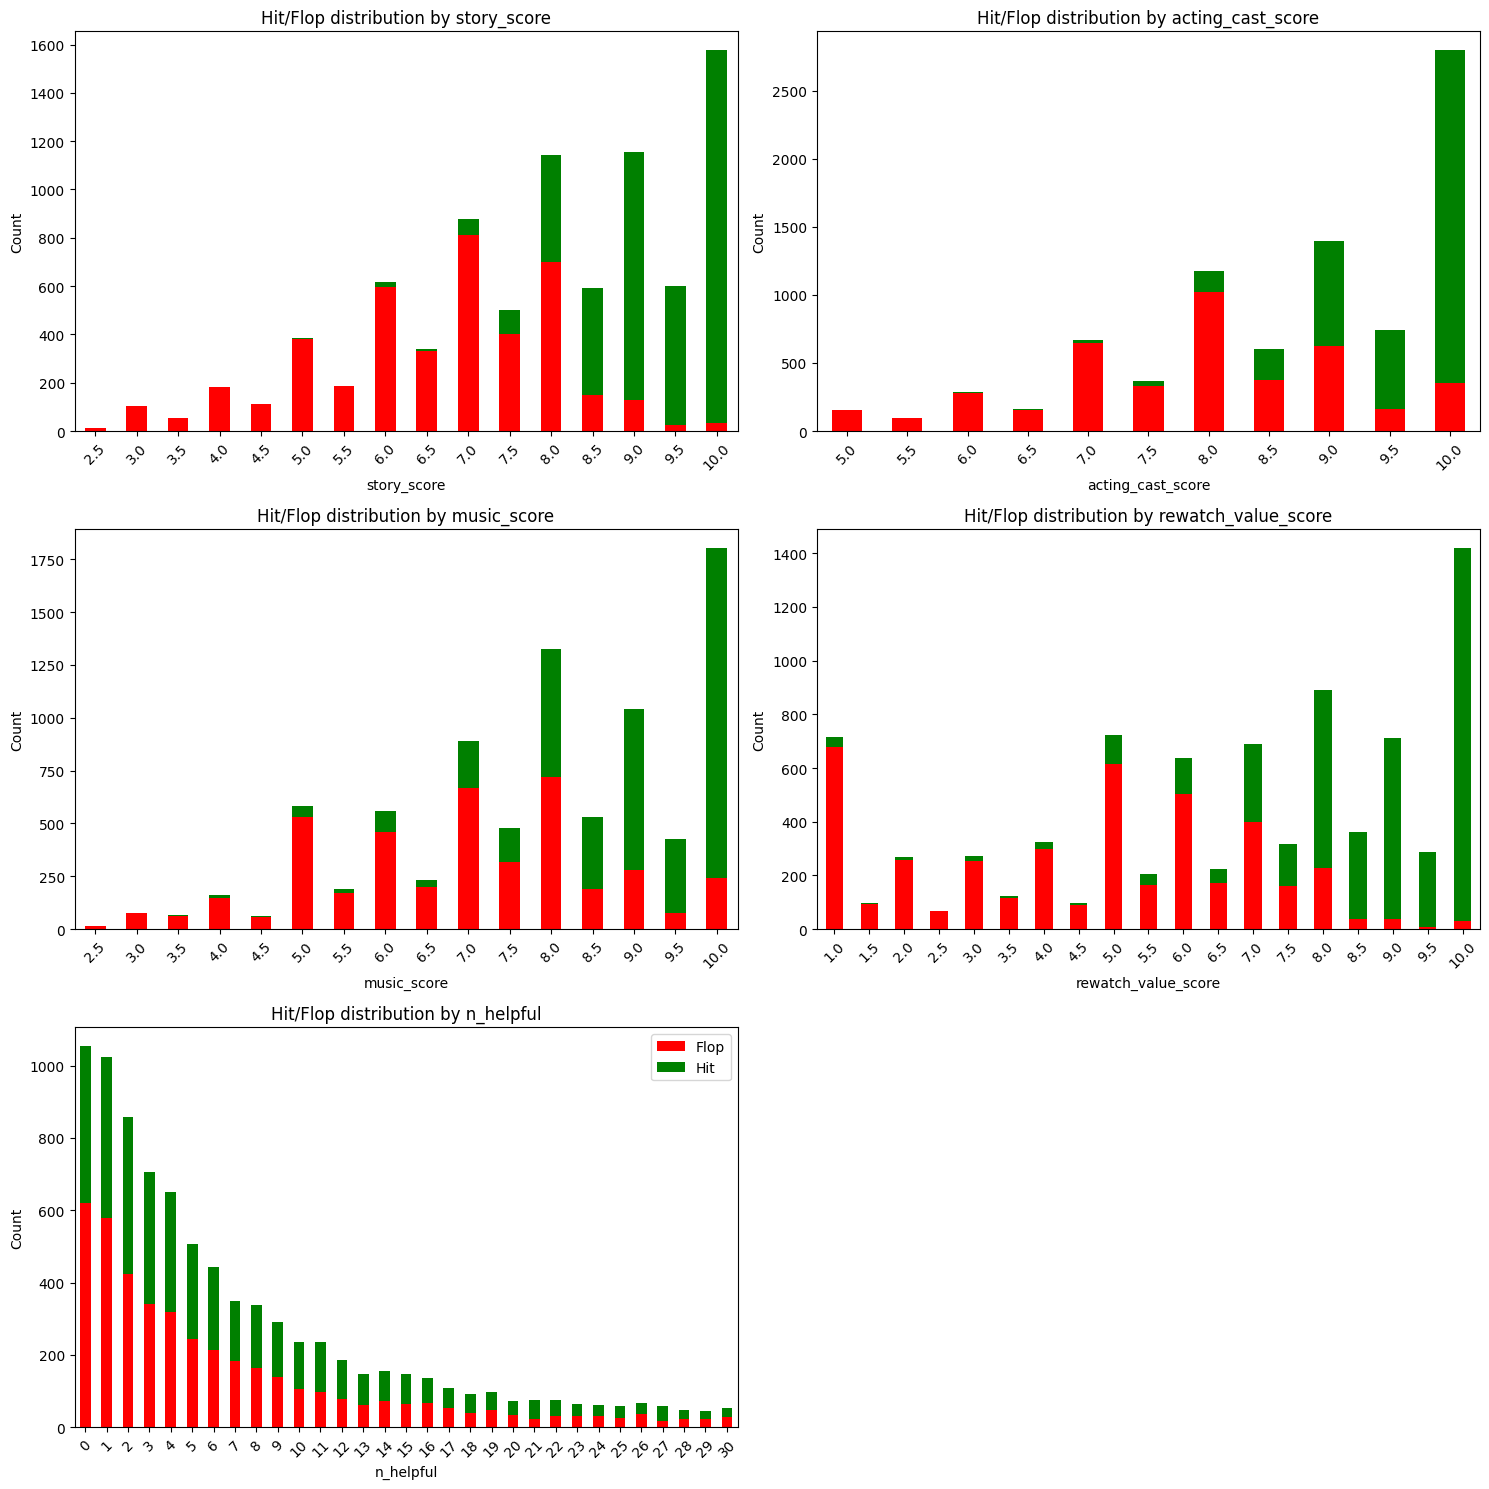

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df, 'Hit/Flop' column, and other relevant columns are defined as per your dataset

# Exclude columns that are not needed for plotting
columns_to_plot = [col for col in df.columns if col not in ['Hit', 'Hit/Flop', 'overall_score']]

# Calculate number of rows and columns for subplot grid
num_cols = 2  # Number of columns in subplot layout
num_rows = (len(columns_to_plot) + 1) // num_cols  # Calculate number of rows needed

# Adjust figure size based on number of subplots
fig_width = 15
fig_height = num_rows * 5  # Adjust height based on number of rows

plt.figure(figsize=(fig_width, fig_height))

# Iterate through each column and plot
for i, col in enumerate(columns_to_plot):
    plt.subplot(num_rows, num_cols, i + 1)
    Hit_Flop_cross = pd.crosstab(index=df[col], columns=df['Hit/Flop'])
    Hit_Flop_cross.plot(kind='bar', stacked=True, color=['red', 'green'], ax=plt.gca(), legend=None)
    plt.title(f'Hit/Flop distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)
    plt.tight_layout(pad=3.0)  # Adjust spacing between subplots

# Adjust layout and display the plot
plt.tight_layout()
plt.legend(['Flop', 'Hit'], loc='upper right')
plt.show()


In [39]:
# Iterate through each column
for column in df.columns:
    #get unique values in the column
    unique_values=df[column].unique()
    #print the column name and its unique values
    print(f"Unique values in {column} column")
    print(unique_values)
    print()

Unique values in story_score column
[ 9.   8.   6.  10.   6.5  7.5  9.5  8.5  7.   5.5  3.5  5.   4.   4.5
  3.   2.5]

Unique values in acting_cast_score column
[ 9.   9.5  8.5  7.  10.   7.5  8.   5.5  6.   5.   6.5]

Unique values in music_score column
[10.   7.   7.5  8.   9.   8.5  9.5  3.5  5.   2.5  5.5  6.   6.5  4.
  3.   4.5]

Unique values in rewatch_value_score column
[ 9.   8.   6.5  3.5 10.   8.5  5.   6.   4.   4.5  7.   3.   2.   1.
  7.5  5.5  9.5  2.5  1.5]

Unique values in overall_score column
[ 9.   8.5  7.5  6.  10.   8.   6.5  9.5  7.   5.5  4.5  5.   4.   3.5
  3. ]

Unique values in n_helpful column
[23 26 24 25 12  4  8  3 17  2  5  1  9  7 11 19 10 28 14 15  0 16 29 21
 13  6 20 27 22 30 18]

Unique values in Hit/Flop column
['Hit' 'Flop']



In [40]:
df.to_csv('Data_Sets/filtered_data.csv')

In [41]:
data=pd.read_csv(r'Data_Sets/filtered_data.csv')

In [42]:
data=data.drop('Unnamed: 0',axis=1)

In [43]:
#display the first few rows and all columns
pd.set_option('display.max_columns',None)
print("First few rows of data:")
print(data.head())

First few rows of data:
   story_score  acting_cast_score  music_score  rewatch_value_score  \
0          9.0                9.0         10.0                  9.0   
1          9.0                9.5          7.0                  8.0   
2          8.0                8.5          7.5                  6.5   
3          6.0                7.0          7.5                  3.5   
4         10.0               10.0         10.0                 10.0   

   overall_score  n_helpful Hit/Flop  
0            9.0         23      Hit  
1            8.5         26      Hit  
2            7.5         24     Flop  
3            6.0         25     Flop  
4           10.0         12      Hit  


In [44]:
numerical_cols=data.select_dtypes(exclude=['category','object']).columns
categorical_cols=data.select_dtypes(include=['category','object']).columns

In [45]:
categorical_cols

Index(['Hit/Flop'], dtype='object')

In [46]:
numerical_cols

Index(['story_score', 'acting_cast_score', 'music_score',
       'rewatch_value_score', 'overall_score', 'n_helpful'],
      dtype='object')

In [47]:
#drop numerical columns from data
data_categorical=data.drop(columns=numerical_cols)

#perform one hot encoding on categorical columns
encoded_data=pd.get_dummies(data_categorical,columns=[])
encoded_data.head()

,Hit/Flop
0,Hit
1,Hit
2,Flop
3,Flop
4,Hit


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming encoded_data is already created from one-hot encoding
# numerical_cols should be defined earlier as numerical columns from your dataset

# Pipeline for numerical columns
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Transform numerical columns
numerical_data = numerical_pipeline.fit_transform(data[numerical_cols])

# Convert transformed numerical data back to DataFrame
numerical_data_df = pd.DataFrame(numerical_data, columns=numerical_cols)

# Combine numerical and categorical data
final_data = pd.concat([encoded_data, numerical_data_df], axis=1)


# Now final_data contains all your processed data ready for modeling

In [50]:
final_data.head(30)

,Hit/Flop,story_score,acting_cast_score,music_score,rewatch_value_score,overall_score,n_helpful
0,Hit,0.631961,0.218491,1.188657,0.862006,0.600700,2.266597
1,Hit,0.631961,0.602089,-0.503845,0.509327,0.300154,2.688481
2,Flop,0.062842,-0.165107,-0.221761,-0.019691,-0.300938,2.407225
3,Flop,-1.075395,-1.315902,-0.221761,-1.077727,-1.202576,2.547853
4,Hit,1.201079,0.985688,1.188657,1.214684,1.201793,0.719692
5,Flop,0.631961,0.602089,0.060322,0.685666,-0.000392,-0.405330
6,Flop,-0.790836,-0.932304,-0.221761,-0.548709,-0.902030,0.157181
7,Flop,0.062842,0.218491,0.624490,0.509327,-0.000392,-0.545958
8,Flop,-0.221717,-0.165107,0.342406,-0.196030,-0.300938,1.422831
9,Flop,-0.790836,-0.548706,0.060322,-0.019691,-0.902030,-0.686585


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import os
import joblib

In [52]:
#extract features (X) and target variable(y)
X=final_data.drop('Hit/Flop',axis=1)
y=final_data['Hit/Flop']

In [53]:
#convert target variable to numerical 0 and 1
y=y.map({'Flop':0,'Hit':1})
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model


In [55]:
# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

In [56]:
# Fit the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [57]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [58]:
# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [59]:
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

Training Accuracy: 1.00
Testing Accuracy: 1.00


In [60]:
# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[856   0]
 [  0 832]]


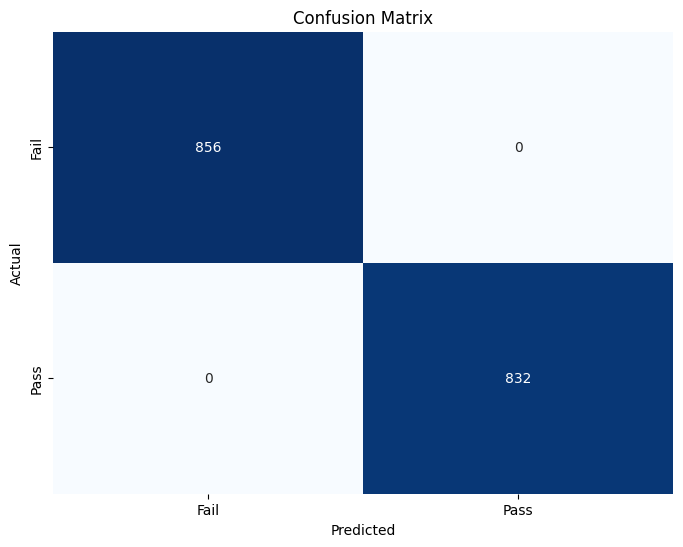

In [61]:
# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [62]:
# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

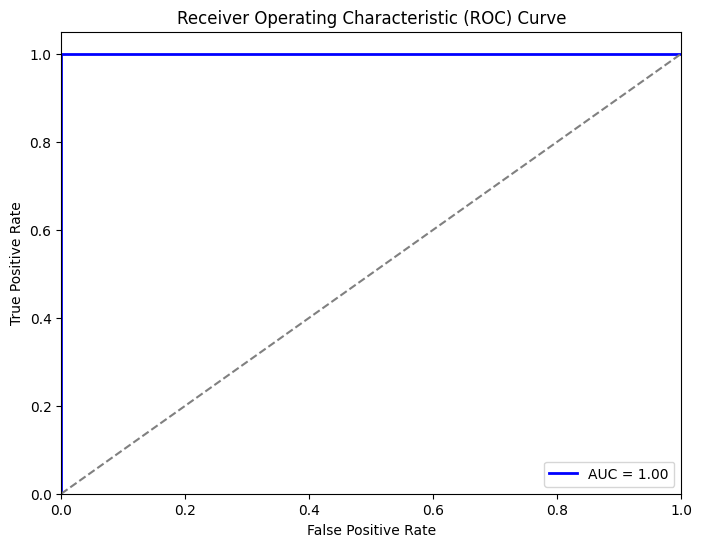

In [63]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [64]:
# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/decision_tree_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Model saved at ML_MODEL/decision_tree_model.pkl


Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[856   0]
 [  0 832]]


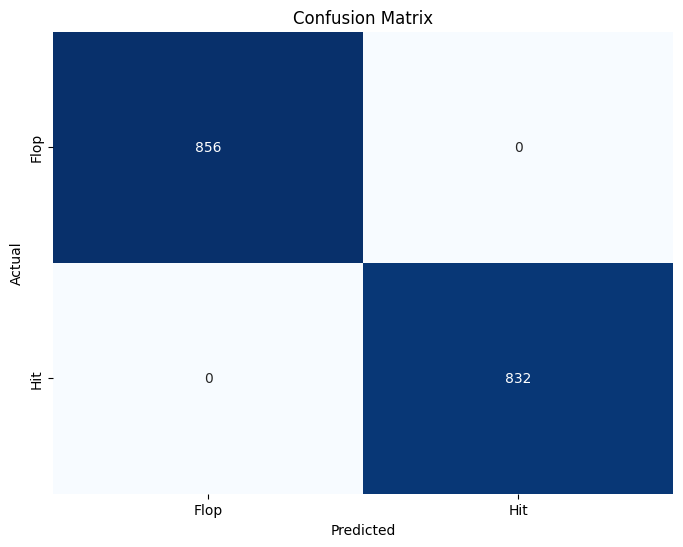

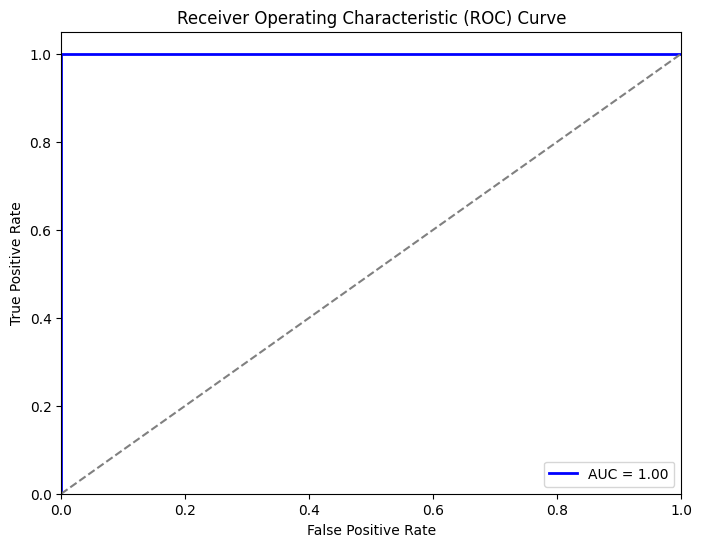

Model saved at ML_MODEL/random_forest_model.pkl


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model






# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)




# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Flop', 'Hit'], yticklabels=['Flop', 'Hit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/random_forest_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

In [66]:
abc=final_data.drop('Hit/Flop', axis=1)

In [67]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8436 entries, 0 to 8435
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   story_score          8436 non-null   float64
 1   acting_cast_score    8436 non-null   float64
 2   music_score          8436 non-null   float64
 3   rewatch_value_score  8436 non-null   float64
 4   overall_score        8436 non-null   float64
 5   n_helpful            8436 non-null   float64
dtypes: float64(6)
memory usage: 395.6 KB


In [68]:
final_data['Hit/Flop'].value_counts()

Hit/Flop
Hit     4231
Flop    4205
Name: count, dtype: int64

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[856   0]
 [  0 832]]


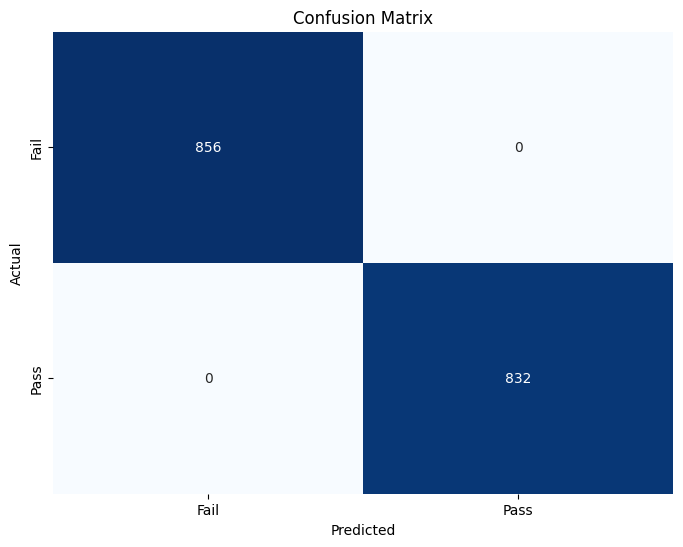

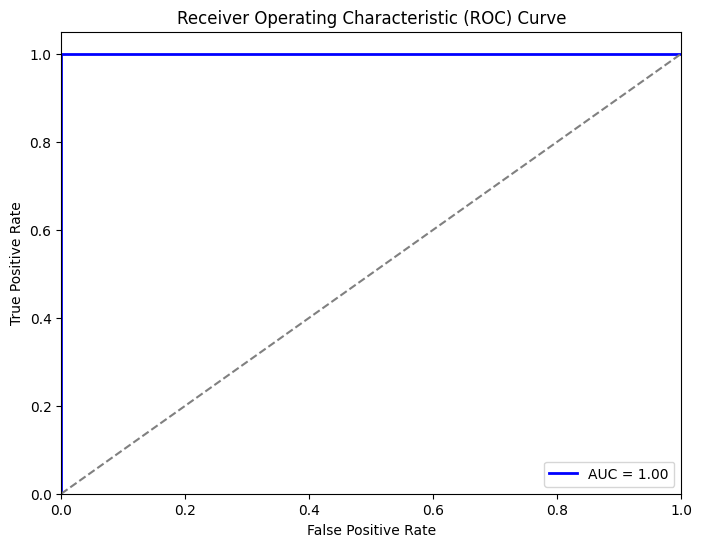

Model saved at ML_MODEL/logistic_regression_model_blabla.pkl


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model





# Extract features (X) and target variable (y)
X = final_data.drop('Hit/Flop', axis=1)
y = final_data['Hit/Flop']

# Convert target variable to numerical (0 and 1)
y = y.map({'Flop': 0, 'Hit': 1})
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Initialize logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)


# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/logistic_regression_model_blabla.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

Training Accuracy: 0.98
Testing Accuracy: 0.97
Confusion Matrix:
[[825  31]
 [ 14 818]]


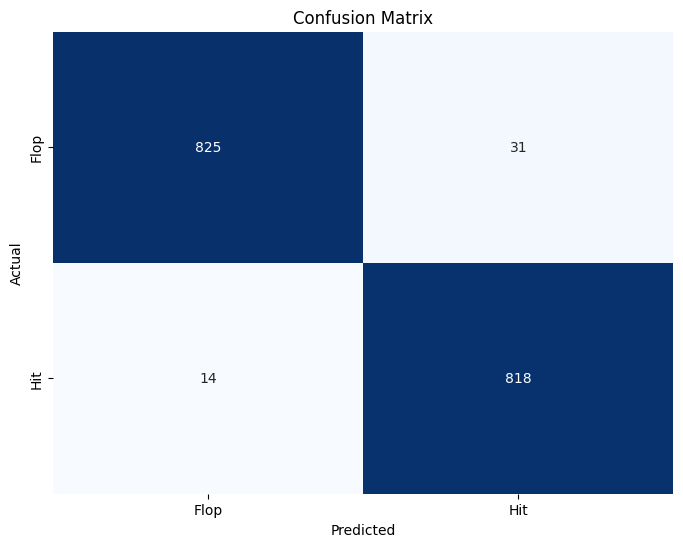

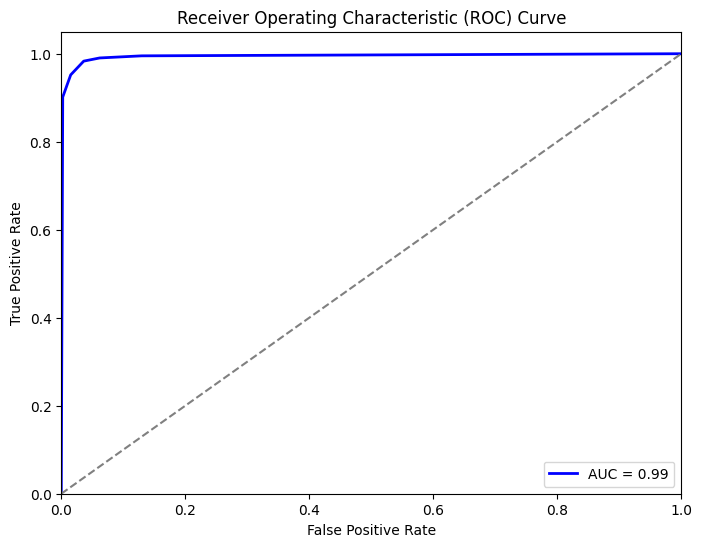

Model saved at ML_MODEL/knn_model.pkl


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib  # For saving the model




# Initialize KNN classifier
model = KNeighborsClassifier()

# Fit the model
model.fit(X_train, y_train)





# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Flop', 'Hit'], yticklabels=['Flop', 'Hit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/knn_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
import joblib
import matplotlib.pyplot as plt


# Extract features (X) and target variable (y)
X = final_data.drop(columns=['overall_score','Hit/Flop'])
y = final_data['overall_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Training MSE: 0.03
Testing MSE: 0.16
Training R-squared: 0.97
Testing R-squared: 0.84
Model saved at ML_MODEL/random_forest_model.pkl


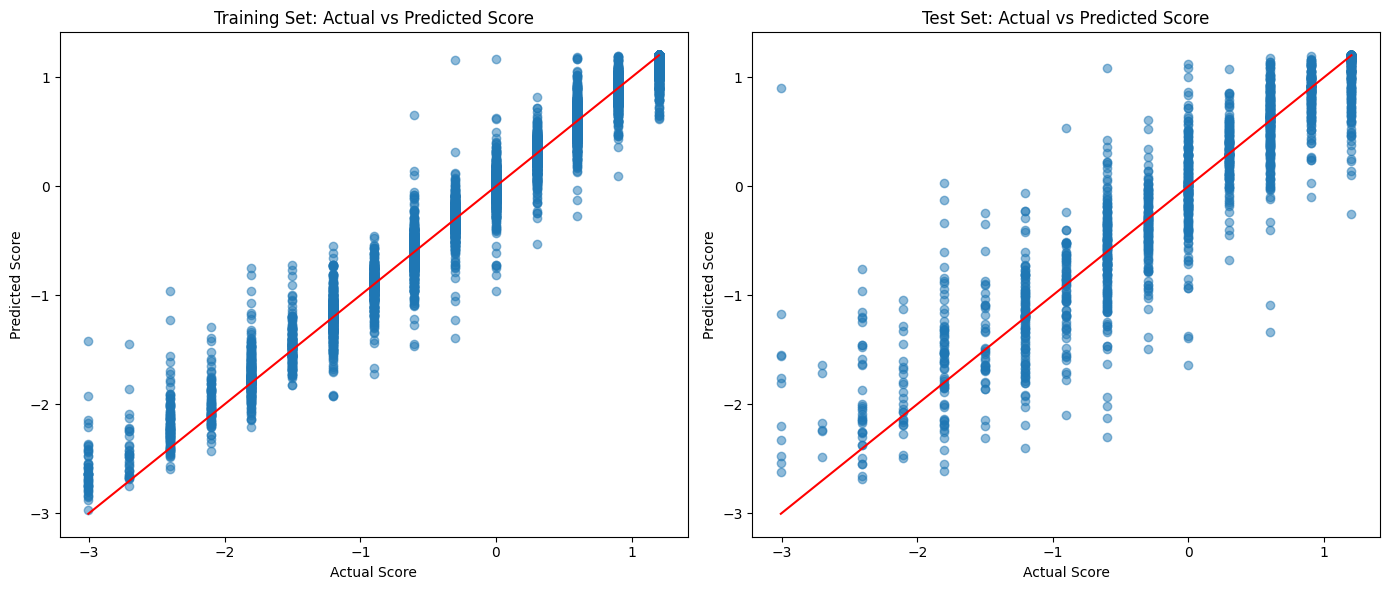

In [73]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared scores for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse:.2f}')
print(f'Testing MSE: {test_mse:.2f}')
print(f'Training R-squared: {train_r2:.2f}')
print(f'Testing R-squared: {test_r2:.2f}')

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/random_forest_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# Visualize the performance with scatter plots (optional)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Training Set: Actual vs Predicted Score')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Test Set: Actual vs Predicted Score')

plt.tight_layout()
plt.show()

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
import joblib
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `final_data` with your data

# Extract features (X) and target variable (y)
X = final_data.drop(columns=['overall_score','Hit/Flop'])
y = final_data['overall_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Initialize the model
model = XGBRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Training MSE: 0.05
Testing MSE: 0.16
Training R-squared: 0.95
Testing R-squared: 0.84
Model saved at ML_MODEL/xgboost_model.pkl


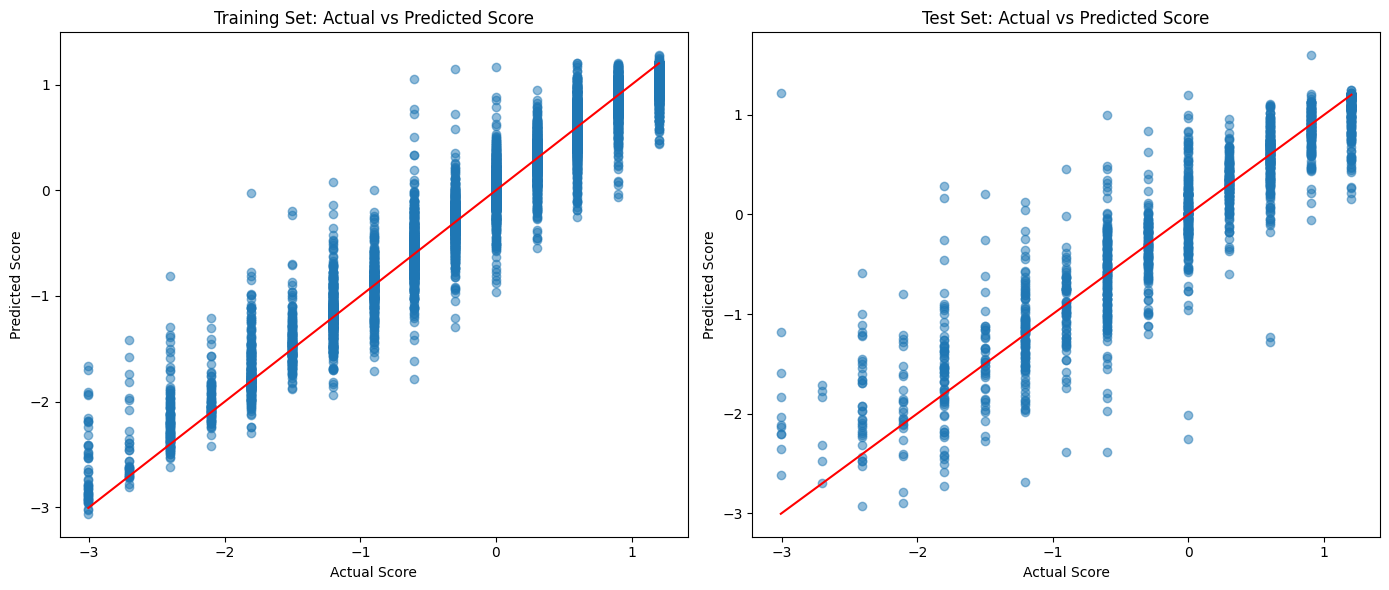

In [76]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared scores for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse:.2f}')
print(f'Testing MSE: {test_mse:.2f}')
print(f'Training R-squared: {train_r2:.2f}')
print(f'Testing R-squared: {test_r2:.2f}')

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/xgboost_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# Visualize the performance with scatter plots (optional)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Training Set: Actual vs Predicted Score')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Test Set: Actual vs Predicted Score')

plt.tight_layout()
plt.show()

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
import joblib
import matplotlib.pyplot as plt

# Assuming you have a DataFrame `final_data` with your data

# Extract features (X) and target variable (y)
X = final_data.drop(columns=['overall_score','Hit/Flop'])
y = final_data['overall_score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Initialize the model
model = MLPRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

MLPRegressor(random_state=42)

Training MSE: 0.12
Testing MSE: 0.13
Training R-squared: 0.88
Testing R-squared: 0.87
Model saved at ML_MODEL/neural_network_model.pkl


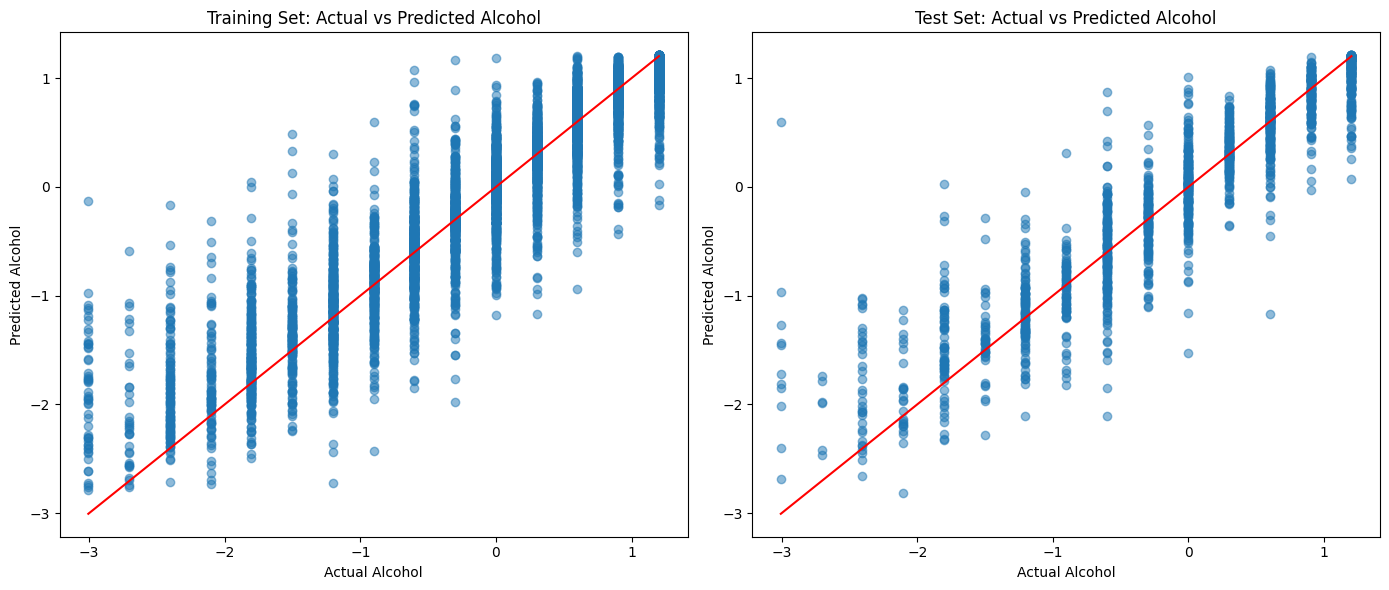

In [79]:
# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared scores for training and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training MSE: {train_mse:.2f}')
print(f'Testing MSE: {test_mse:.2f}')
print(f'Training R-squared: {train_r2:.2f}')
print(f'Testing R-squared: {test_r2:.2f}')

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/neural_network_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# Visualize the performance with scatter plots (optional)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red')
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Training Set: Actual vs Predicted Alcohol')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Test Set: Actual vs Predicted Alcohol')

plt.tight_layout()
plt.show()